In [1]:
%pylab inline
import scipy
rcParams['font.family'] = 'Myriad Pro'
rcParams['font.weight'] = 'bold'
# # These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  
#tableau20 = [(0.59375, 0.257813, 0.886719),(0.800781, 0.0625, 0.460938), (0.278431, 0.788235, 0.478431), (0.917647, 0.682353, 0.105882), (0.372549, 0.596078, 1.), (0.8, 0.8, .8), (1.0, .3882, .2784)];

tableaugray = [(123,102,210),(207,207,207),(165,172,175),(143,135,130),(96,99,106),(65,68,81)]

tab_purp = [(255,192,218),(216,152,186),(180,177,155),(153,86,136),(139,124,110),\
         (220,95,189),(95,90,65),(171,106,213),(219,212,197)]

tab_og = [(255,127,15), (172,217,141),(60,183,204),(50,162,81),(255,217,74),(184,90,13),\
(152,217,228),(134,180,169),(57,115,124),(204,201,77),(130,133,59)]

tab_br = [(255,182,176),(240,39,32),(181,200,226),(172,97,60),(44,105,176),(233,195,155),\
(221,201,180),(181,223,253),(172,135,99),(107,163,214),(244,115,122),(189,10,54)]

tab_extra = [(208,152,238), (166,153,232), (219,212,197)]

all_colors = tableau20 + tableaugray + tab_purp + tab_og + tab_br + tab_extra

for i in range(len(all_colors)):  
    r, g, b = all_colors[i]  
    all_colors[i] = (r, g, b)
    all_colors[i] = (r / 255., g / 255., b / 255.)  

bcolor1 = (53 / 255., 56 / 255., 57 / 255.)
bcolor2 = (59 / 255., 60 / 255., 54 / 255.)

rcParams['axes.color_cycle'] = all_colors
rcParams['axes.labelcolor'] = bcolor1
rcParams['axes.edgecolor'] = bcolor2
rcParams['xtick.color'] = bcolor2
rcParams['ytick.color'] = bcolor2

rcParams['legend.frameon'] = False

rcParams['axes.facecolor'] = 'none'

rcParams['lines.linewidth'] = 2

rcParams['figure.facecolor'] = 'none'
rcParams['savefig.facecolor'] = 'none'

#rcParams['figure.savefig.bbox']= 'none'

# for ii in xrange(50):
#     plot([rand(), rand()],[rand(), rand()])
#savefig("out.pdf")

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_diffEQ(sol, save_flag=False, varname='area'):
    # Plot simulation results
    
    figure()
    pylab.gray()
    imshow(sol, interpolation='nearest', aspect=(1.0*len(sol[0,:]))/len(sol[:,0]))
    if save_flag:
        savefig(varname + '_kymo.pdf')

    figure()
    for ii in xrange(len(sol[0,:])):
        plot(sol[:,ii],'-')
    if save_flag:
        savefig(varname + '_v_time.pdf')

    figure()
    plot(sol[0,:],'-')
    plot(sol[-1,:],'-')
    if save_flag:
        savefig(varname + '_profile.pdf')



# Simulation

In [10]:

def vectorfield(h_flat, t, p):
    # w and y are the two field variables defined over space

    # x1, y1, x2, y2 = w
    # w is a matrix of independent variables (Amplitude)
    #m1, m2, k1, k2, L1, L2, b1, b2 = p
    # p is a list of parameters for the system
    
    
    mdpt = int(floor(len(h_flat)/2))
    sq = int(floor(sqrt(mdpt)))
    
#     print sq
    c = reshape(p,(sq,sq))
    
    w = reshape(h_flat[:mdpt],(sq,sq))
    y = reshape(h_flat[mdpt:],(sq,sq))
    
    # time t doesn't get used in this particular equation set
    
    f = zeros([len(w), len(w)])
    g = zeros([len(y), len(y)])
    
    N = len(w)

    # an array of y[i][j]' (the array of differential equations)
    for ii in xrange(len(w)):
            for jj in xrange(len(w)):
                # uncoupled harmonic oscillators
                totes = 0 
                
                if (jj != N-1):
                    totes += y[ii][jj+1]
                else:
                    totes += y[ii][0]
                    
                if (jj != 0):
                    totes += y[ii][jj-1]
                else:
                    totes += y[ii][N-1]
                    
                if (ii != N-1):
                    totes += y[ii+1][jj]
                else:
                    totes += y[0][jj]
                    
                if (ii != 0):
                    totes += y[ii-1][jj]
                else:
                    totes += y[N-1][jj]
                    
                    # .1 is good in front of totes parameter
                    
                    
                # fast field variable
                f[ii][jj] = c[ii][jj]*(w[ii][jj] - (w[ii][jj]**3)/3 + y[ii][jj] + .1*totes)
                # slow field variable
                g[ii][jj] = - w[ii][jj]/c[ii][jj]
                

    return concatenate((ravel(f), ravel(g)),axis=0)

In [ ]:
from scipy.integrate import odeint

# frequencies matrix
N = 100

# pick a central frequency with some spread (sub-leading)
# c = 2*ones([N,N])

# for ii in xrange(N):
#     for jj in xrange(N):
#         c[ii][jj] = (5 + .5*(2*(ii + jj) - N - 1)/(N - 1))
# c +=  random.normal(loc=0.0, scale=1,size=[N,N])

c = (5 + .5*(2 - N - 1)/(N - 1)) + random.normal(loc=0.0, scale=1,size=[N,N])

# initial values of field
# phase variable
x0 = ravel(random.normal(loc=0.0, scale=1,size=[N,N]))
y0 = ravel(zeros([N, N]))

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 200.0
numpoints = 100

# time series on which to solve diffEQ
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Use ODE solver
wsol = odeint(vectorfield, concatenate((x0, y0),axis=0), t, args=(ravel(c),),
              atol=abserr, rtol=relerr)

# Print the solution.
for ii in xrange(len(wsol)):
    plot(t,wsol.T[ii])


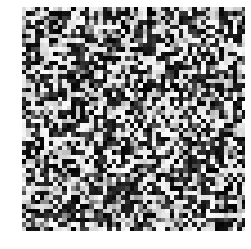

In [23]:
pylab.gray()
for ii in xrange(len(t)):
    if (ii % 10) == 0:
        imshow(reshape(wsol[ii][:N**2],[N,N]),interpolation='nearest')
        axis('off')
        savefig('sim_out/' + 'out' + str(ii) + '.png',bbox_inches='tight')


Why are all intiial trajectories immediately pulled to limit cycle?
What is the origin of the weird adjacent desynchronization

# Delay Equation

In [36]:
# Fast spring-like dynamical model in 1D

from scipy.integrate import odeint


def vfield1D(w, time, p):
    

    (y, yprv) = split(w, 2)
    
    # store previous value of y
    ystor = y
    
    yp = zeros(len(y))
    
    k1 = p[0]
    kc = p[1]
    
    # can vectorize all terms that don't depend on neighbors, could probably use a filter for neighbors
    for ii in xrange(len(y)):
        

        yp_here = -k1*(y[ii])
        
        if ii == len(y)-1:
            yp_here += -kc*(yprv[0] + yprv[ii-1])
        elif ii == 0:
            yp_here += -kc*(yprv[ii+1] + yprv[-1:][0])
        else:
            yp_here += -kc*(yprv[ii+1] + yprv[ii-1])
        

        yp[ii] = yp_here
        

    return concatenate((yp, ystor), axis=0)


# ODE solver parameters
stoptime = 1.0
numpoints = 10000
num_xpoints = 10

params = [10.0e-0, 100.0e-0, 20.0e0, 10., 2.0e2]

# time series on which to solve diffEQ
t = linspace(0, stoptime, numpoints)

# Use ODE solver
y0 = 2.0e-3*(rand(num_xpoints)-.5)
y0[3] = .5
yprv0 = zeros(len(y0))

wsol = odeint(vfield1D, concatenate((y0, yprv0), axis=0), t, args=(params,))

(ysol, yprvsol) = split(wsol, 2, axis=1)


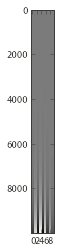

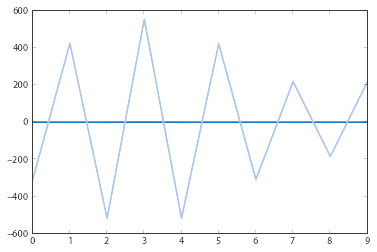

In [37]:
# Plot simulation results
save_flag=False

figure()
pylab.gray()
imshow(ysol, interpolation='nearest', aspect=.01)
if save_flag:
    savefig('area_kymo.pdf')

figure()
plot(ysol[0,:],'-')
plot(ysol[-1,:],'-')

### Guitar string model as sanity check # is it the boundary conditions?

In [ ]:
# Fast spring-like dynamical model in 1D

from scipy.integrate import odeint


def vfield1D(u, time, p):
    
    (y, c) = split(u, 2)
    
    yp = zeros(len(y))
    cp = zeros(len(c))

    k1 = p[0]
    kc = p[0]

    
    # can vectorize all terms that don't depend on neighbors, could probably use a filter for neighbors
    for ii in xrange(len(y)):
        
        
        yp_here = -k1*(y[ii])
        
        if ii == len(y)-1:
            # yp_here += -kc*(y[0] + y[ii-1])
            # yp_here += -kc*(.5*y[ii-1])
            yp_here = 0
        elif ii == 0:
            # yp_here += -kc*(y[ii+1] + y[-1:][0])
            # yp_here += -kc*(.5*y[ii+1])
            yp_here = 0
        else:
            yp_here += -kc*(y[ii+1] + y[ii-1])
        
        yp[ii] = yp_here + rand(1)*1e-4
        
        
        # reaction step
        cp[ii] = 0.0
        

    return concatenate((yp, cp), axis=0)



# ODE solver parameters
abserr = 1.0e-12
relerr = 1.0e-12
stoptime = 3.0e-1
numpoints = 1000
num_xpoints = 100

params = [1.0e1, 2.0e-3]

# time series on which to solve diffEQ
t = linspace(0, stoptime, numpoints)

# Use ODE solver
y0 = 1e-6*(rand(num_xpoints)-.5)
y0[50:52]=1.0
c0 = zeros(num_xpoints)
u0 = concatenate((y0, c0), axis=0)
# wsol = odeint(vfield1D, u0, t, args=(params,),
#               atol=abserr, rtol=relerr)
wsol = odeint(vfield1D, u0, t, args=(params,))

# how do I increase crossovers?

(ysol, csol) = split(wsol, 2, axis=1)

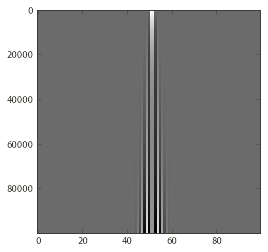

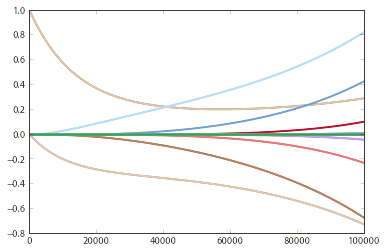

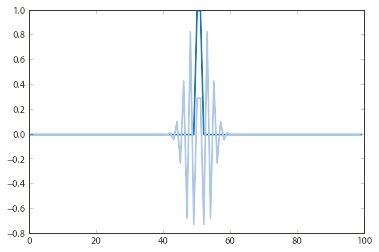

In [95]:
# Plot simulation results
save_flag=False

figure()
pylab.gray()
imshow(ysol, interpolation='nearest', aspect=.001)
if save_flag:
    savefig('area_kymo.pdf')

figure()
for ii in xrange(len(ysol[0,:])):
    plot(ysol[:,ii],'-')
if save_flag:
    savefig('area_v_time.pdf')
    

figure()
plot(ysol[0,:],'-')
plot(ysol[-1,:],'-')
if save_flag:
    savefig('area_profile.pdf')
    

### Rest length relaxation

In [99]:
# Fast spring-like dynamical model in 1D

from scipy.integrate import odeint


def vfield1D(u, time, p):
    
    (y, c) = split(u, 2)
    
    yp = zeros(len(y))
    cp = zeros(len(c))
    
    kr = p[0]
    
    k1 = p[1]
    k3 = p[2]
    kc = p[3]
    
    # can vectorize all terms that don't depend on neighbors, could probably use a filter for neighbors
    # Can make it depend on second neighbors as well?
    for ii in xrange(len(y)):
        
        prev_yp = yp[ii]
        
        yp_here = -k1*(y[ii]-c[ii]) - k3*(y[ii]-c[ii])**3
        
        L = len(y)
        
        yp_here += -kc*(y[mod(ii+1, L)] + y[mod(ii-1, L)]) - .5*kc*(y[mod(ii+2, L)] + y[mod(ii-2, L)])
#         if ii == len(y)-1:
#             yp_here += -kc*(y[0] + y[ii-1])
#         elif ii == 0:
#             yp_here += -kc*(y[ii+1] + y[-1:][0])
#         else:
#             yp_here += -kc*(y[ii+1] + y[ii-1])
        
        yp[ii] = yp_here
        
        
        # decay step
        cp[ii] = kr*(y[ii] + c[ii]) + prev_yp
        

        

    return concatenate((yp, cp), axis=0)



# ODE solver parameters
abserr = 1.0e-12
relerr = 1.0e-12
stoptime = 1.0
numpoints = 10000
num_xpoints = 100

# TRY SCATTERING PARAMETER VALUES ACROSS LATTICE TO PREVENT LOCKING
# TRY MONTE CARLO OR EVEN GILLESPIE
# TRY ADDING IN A "ZERO DAMPING" CASE
# TRY SIMULATING FOR EVEN LONGER?
# NEED TO ENFORCE THAT THE SUM OF ALL Y IS ZERO (FIXED LENGTH SHEET)
# TRY A DELAY EQUATION

# coupling between conc and mech
# self k1
# self k3
# coupling k
# rate of decay of c
params = [5.0e-2, 1.0e-2, 20.0e-1, 10.0]

# time series on which to solve diffEQ
t = linspace(0, stoptime, numpoints)

# Use ODE solver
y0 = ones(num_xpoints) + 1e-3*(rand(num_xpoints)-.5)
y0[51]=1.5

y0[13:18]=1.5

y0[21]=-1.5
y0[11]=1.5

c0 = ones(num_xpoints)

u0 = concatenate((y0, c0), axis=0)
# wsol = odeint(vfield1D, u0, t, args=(params,),
#               atol=abserr, rtol=relerr)
wsol = odeint(vfield1D, u0, t, args=(params,))

# how do I increase crossovers?

(ysol, csol) = split(wsol, 2, axis=1)

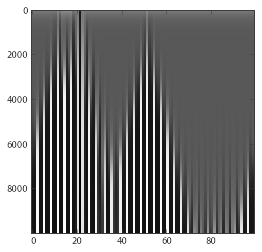

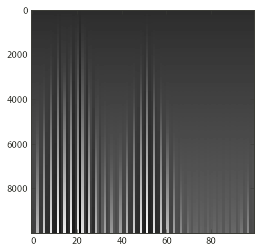

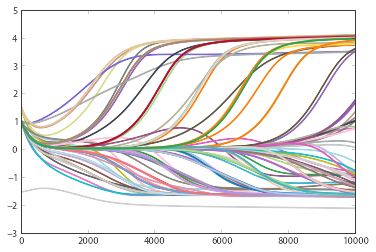

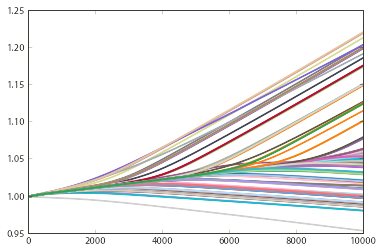

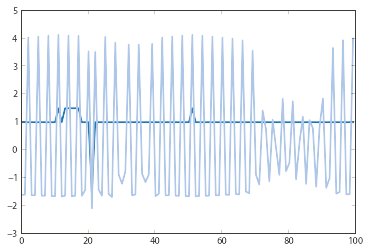

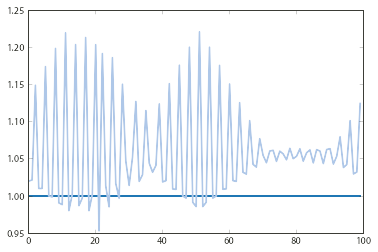

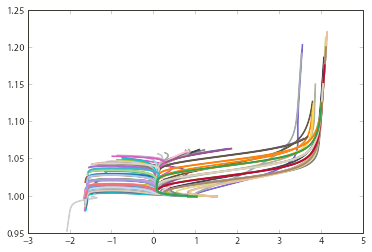

In [100]:
# Plot simulation results
save_flag=False

figure()
pylab.gray()
imshow(ysol, interpolation='nearest', aspect=.01)
if save_flag:
    savefig('area_kymo.pdf')

figure()
imshow(csol, interpolation='nearest', aspect=.01)
if save_flag:
    savefig('conc_kymo.pdf')

figure()
for ii in xrange(len(ysol[0,:])):
    plot(ysol[:,ii],'-')
if save_flag:
    savefig('area_v_time.pdf')
    
figure()
for ii in xrange(len(csol[0,:])):
    plot(csol[:,ii],'-')
if save_flag:
    savefig('conc_v_time.pdf')

figure()
plot(ysol[0,:],'-')
plot(ysol[-1,:],'-')
if save_flag:
    savefig('area_profile.pdf')
    
figure()
plot(csol[0,:],'-')
plot(csol[-1,:],'-')
if save_flag:
    savefig('conc_profile.pdf')
    
figure()
for ii in xrange(len(ysol[0,:])):
    plot(ysol[:,ii],csol[:,ii])
    hold(True)
if save_flag:
    savefig('phase_space.pdf')

# Fast-slow model

What do I know about cell rearrangement timescales in trichoplax?

--over short timescales, elastic lattice; over long timescales, rearrangement and viscous behavior  
$\rightarrow$ Maxwell model:  $F_n = 

In [110]:
# Fast spring-like dynamical model in 1D

from scipy.integrate import odeint


def vfield1D(u, time, p):
    
    (y, c) = split(u, 2)
    
    yp = zeros(len(y))
    cp = zeros(len(c))
    
    c_cp = p[0]
    
    k1 = p[1]
    k2 = p[2]
    
    kc = p[3]
    
    c_rate = p[4]
    
    # can vectorize all terms that don't depend on neighbors, could probably use a filter for neighbors
    for ii in xrange(len(y)):
        
        # introduce a defect:
        if ii == 20:
            k1 = k1*100
            k2 = k2*100
            kc = kc*100
        
        yp_here = -k1*(y[ii]) - k2*(y[ii])**3
        
        if ii == len(y)-1:
            yp_here += -kc*(y[0] + y[ii-1])
            #yp_here += -kc*(.5*y[ii-1])
        elif ii == 0:
            yp_here += -kc*(y[ii+1] + y[-1:][0])
            #yp_here += -kc*(.5*y[ii+1])
        else:
            yp_here += -kc*(y[ii+1] + y[ii-1])
        
#         # coupling via an external spring only
#         yp_here = -kc*sum(y)
        
    # like Dierkes
#         yp[ii] = yp_here - c_cp*c[ii]
#         cp[ii] = -c_rate*c[ii] - c[ii]*(yp[ii]/y[ii])

    # like myocyte
#         cp[ii] = -y[ii]/c_cp

    # simplest model:
# cp[ii] = -c_rate*c[ii] + 1.0e-6*y[ii]

        # reaction:  concentration of c tends to drive y away from zero in same direction as c
        yp[ii] = yp_here + c_cp*c[ii]
        
        
        cD = 30.0e0
        
        
        # decay step
        cp_here = -c_rate*c[ii]
        
        # diffusion step
        cp_here += -cD*2*c[ii]
        if ii == len(y)-1:
            cp_here += cD*(c[0] + c[ii-1])
        elif ii == 0:
            cp_here += cD*(c[ii+1] + c[-1:][0])
        else:
            cp_here += cD*(c[ii+1] + c[ii-1])
        
        # reaction step
        cp[ii] = cp_here - 1.0e2*y[ii]
        

    return concatenate((yp, cp), axis=0)



# ODE solver parameters
abserr = 1.0e-12
relerr = 1.0e-12
stoptime = 5.0
numpoints = 10000
num_xpoints = 100

# TRY SCATTERING PARAMETER VALUES ACROSS LATTICE TO PREVENT LOCKING
# TRY MONTE CARLO OR EVEN GILLESPIE
# TRY ADDING IN A "ZERO DAMPING" CASE
# TRY SIMULATING FOR EVEN LONGER?
# NEED TO ENFORCE THAT THE SUM OF ALL Y IS ZERO (FIXED LENGTH SHEET)
# TRY A DELAY EQUATION

# coupling between conc and mech
# self k1
# self k3
# coupling k
# rate of decay of c
params = [5.0e-0, 1.0e-0, 20.0e0, 10., 2.0e2]

# time series on which to solve diffEQ
t = linspace(0, stoptime, numpoints)

# Use ODE solver
y0 = 1e-4*2.0*(rand(num_xpoints)-.5)
y0 = zeros(num_xpoints)
y0[50]=1.0
# y0[55:60]=-1.0
c0 = (2*rand(num_xpoints))
c0 = 1.0e-1*rand(num_xpoints)
u0 = concatenate((y0, c0), axis=0)
# wsol = odeint(vfield1D, u0, t, args=(params,),
#               atol=abserr, rtol=relerr)
wsol = odeint(vfield1D, u0, t, args=(params,))

# how do I increase crossovers?

(ysol, csol) = split(wsol, 2, axis=1)

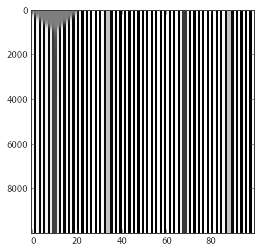

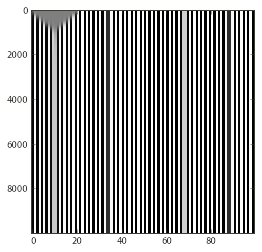

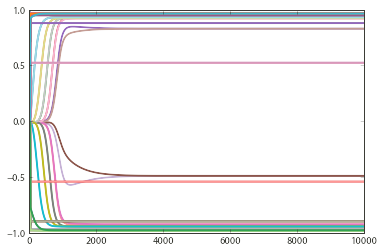

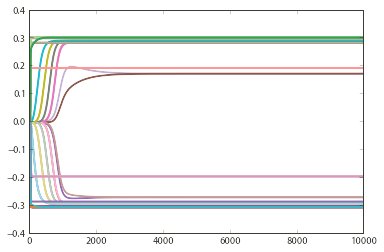

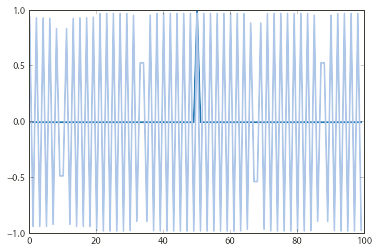

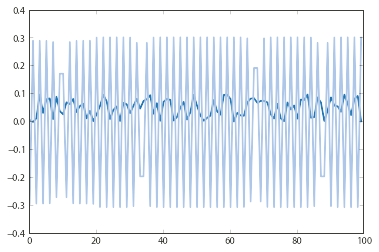

In [109]:
# Plot simulation results
save_flag=False

figure()
pylab.gray()
imshow(ysol, interpolation='nearest', aspect=.01)
if save_flag:
    savefig('area_kymo.pdf')

figure()
imshow(csol, interpolation='nearest', aspect=.01)
if save_flag:
    savefig('conc_kymo.pdf')

figure()
for ii in xrange(len(ysol[0,:])):
    plot(ysol[:,ii],'-')
if save_flag:
    savefig('area_v_time.pdf')
    
figure()
for ii in xrange(len(csol[0,:])):
    plot(csol[:,ii],'-')
if save_flag:
    savefig('conc_v_time.pdf')

figure()
plot(ysol[0,:],'-')
plot(ysol[-1,:],'-')
if save_flag:
    savefig('area_profile.pdf')
    
figure()
plot(csol[0,:],'-')
plot(csol[-1,:],'-')
if save_flag:
    savefig('conc_profile.pdf')
    

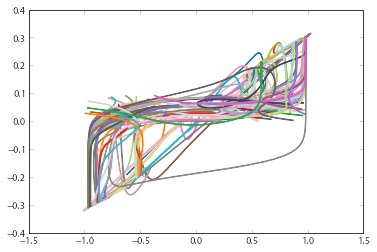

In [98]:
for ii in xrange(len(ysol[0,:])):
    plot(ysol[:,ii],csol[:,ii])
    hold(True)

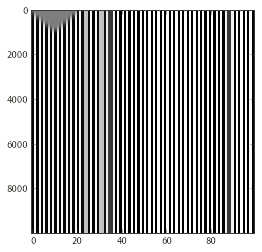

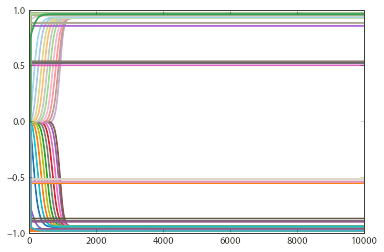

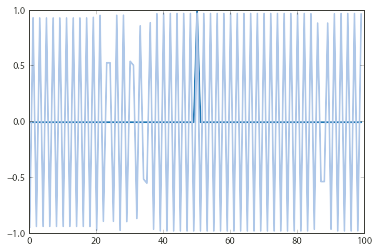

In [113]:
plot_diffEQ(ysol)

### 11/12

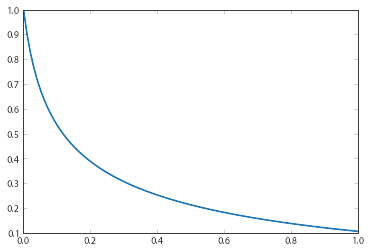

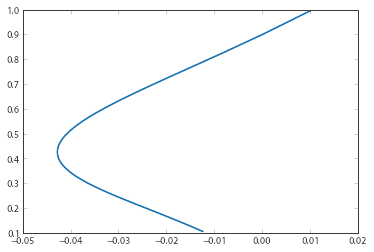

In [17]:
# Single cell

from scipy.integrate import odeint

def prime(u, time, p):
    
    (a, c) = u

    k = p[0]
    
    c_rate = p[1]
    
    ac = p[2]
    
    ap = -a - k*a**3 + ac*c/(1+exp(-a/.05))
    cp = -c_rate*c - a
    
    
    return (ap, cp)


params = [10.0, 10., 1.0]

# ODE solver parameters
abserr = 1.0e-12
relerr = 1.0e-12
stoptime = 1.0
numpoints = 100

# time series on which to solve diffEQ
t = linspace(0, stoptime, numpoints)

# Use ODE solver
a0 = 1.0
c0 = 1.0e-2

wsol = odeint(prime, (a0, c0), t, args=(params,))


plot(t, wsol[:,0])
# hold(True)
figure()
plot(wsol[:,1], wsol[:,0])

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/backends/backend_pdf.py:1007: UserWarning: 'MyriadPro-Semibold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  os.path.basename(filename))


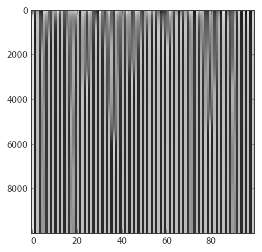

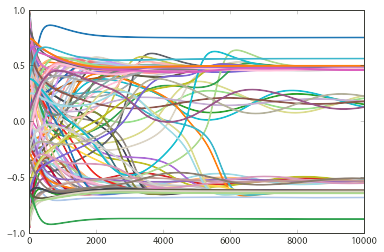

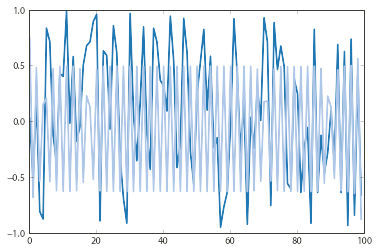

In [26]:
# Fast spring-like dynamical model in 1D

from scipy.integrate import odeint


def vfield1D(u, time, p):
    
    (y, c) = split(u, 2)
    
    yp = zeros(len(y))
    cp = zeros(len(c))
    
    c_cp = p[0]
    
    k2 = p[2]
    
    kc = p[3]
    
    c_rate = p[4]
    
    # vectorize local terms
    yp = -y - k2*y**3
    cp = -c_rate*c - y
    
    
    # can vectorize all terms that don't depend on neighbors, could probably use a filter for neighbors
    for ii in xrange(len(y)):
        
#         # introduce a defect:
#         if ii == 20:
#             k2 = k2/100
#             kc = kc/100

        yp_here = 0.0
        
        if ii == len(y)-1:
            yp_here += -kc*(y[0] + y[ii-1])
            #yp_here += -kc*(.5*y[ii-1])
            yp_here += -kc*(2*y[ii-1])
        elif ii == 0:
            yp_here += -kc*(y[ii+1] + y[-1:][0])
            #yp_here += -kc*(.5*y[ii+1])
            yp_here += -kc*(2*y[ii+1])
        else:
            yp_here += -kc*(y[ii+1] + y[ii-1])
        

#         # reaction:  concentration of c tends to drive y away from zero in same direction as c
#         if y[ii] > 0.0:
#             yp[ii] += yp_here + c_cp*c[ii]
#         else:
#             yp[ii] += yp_here
        
        yp[ii] += yp_here + c_cp*c[ii]/(1+exp(-y[ii]/.05))
  
            
        
        cD = 30.0e-2
        
        
        # decay step
        cp_here = 0.0
        
        # diffusion step
        cp_here += -cD*2*c[ii]
        if ii == len(y)-1:
#             cp_here += cD*(c[0] + c[ii-1])
            cp_here += cD*(2*c[ii-1])
        elif ii == 0:
            #cp_here += cD*(c[ii+1] + c[-1:][0])
            cp_here += cD*(2*c[ii+1])
        else:
            cp_here += cD*(c[ii+1] + c[ii-1])
        
        # reaction step
        cp[ii] += cp_here
        

    return concatenate((yp, cp), axis=0)



# ODE solver parameters
abserr = 1.0e-12
relerr = 1.0e-12
stoptime = 5.0
numpoints = 10000
num_xpoints = 100

# TRY SCATTERING PARAMETER VALUES ACROSS LATTICE TO PREVENT LOCKING
# TRY A SINGLE CELL
# TRY SIMULATING FOR EVEN LONGER?
# NEED TO ENFORCE THAT THE SUM OF ALL Y IS ZERO (FIXED LENGTH SHEET)
# TRY A DELAY EQUATION

# coupling between conc and mech
# self k1
# self k3
# coupling k
# rate of decay of c
params = [10.0e0, 1.0e0, 10.0e0, 3.0, 1.0e-0]

# time series on which to solve diffEQ
t = linspace(0, stoptime, numpoints)

# Use ODE solver
y0 = 2.0e0*(rand(num_xpoints)-.5)
# y0[30:33]=1.0
# y0[50:66]=0.0
# y0[55]=1.0

c0 = (1e-3*rand(num_xpoints))

u0 = concatenate((y0, c0), axis=0)
# wsol = odeint(vfield1D, u0, t, args=(params,),
#               atol=abserr, rtol=relerr)
wsol = odeint(vfield1D, u0, t, args=(params,),atol = 1.0e-18)


# how do I increase crossovers?

(ysol, csol) = split(wsol, 2, axis=1)

plot_diffEQ(ysol,save_flag=True, varname='osc2')

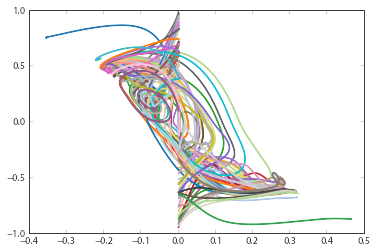

In [33]:
plot(csol,ysol)
savefig('phase_osc2.pdf')

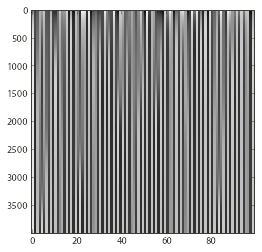

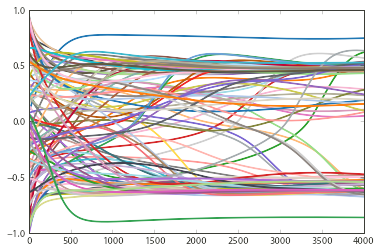

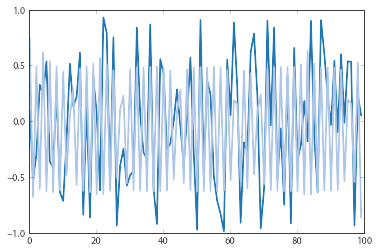

In [25]:
plot_diffEQ(ysol[:4000,:],save_flag=False, varname='randomareas')

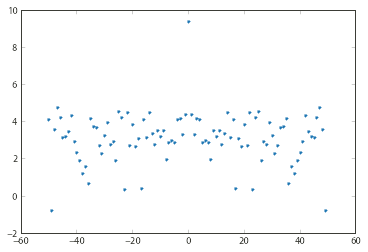

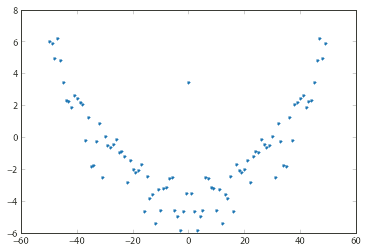

In [34]:
from scipy import fftpack

freqs = fftpack.fftfreq(num_xpoints, 1.0/num_xpoints)


# test = rand(num_xpoints)+10
test = 2*floor(2*rand(num_xpoints))-1
test = 2*floor(sin(arange(0.,num_xpoints)*pi))+1
test = y0+1

F = fftpack.fft(test)

# yf = ysol[9999].T
yf = squeeze(ysol[-1:,:])
F2 = fftpack.fft(yf)

plot(freqs, log(abs(F)**2),'.')
# savefig('initial_fft_osc1.pdf')
hold(True)
figure()
plot(freqs, log(abs(F2)**2),'.')
# savefig('final_fft_osc1.pdf')

### 2D simulation

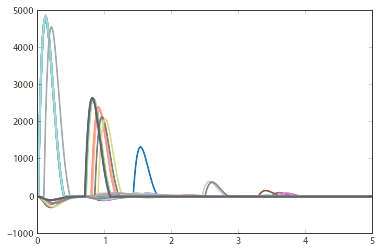

In [52]:
from scipy.integrate import odeint

def vectorfield(h_flat, t, p):
    # w and y are the two field variables defined over space

    # x1, y1, x2, y2 = w
    # w is a matrix of independent variables (Amplitude)
    #m1, m2, k1, k2, L1, L2, b1, b2 = p
    # p is a list of parameters for the system
    
    
    mdpt = int(floor(len(h_flat)/2))
    sq = int(floor(sqrt(mdpt)))
    
    (ac, k3, c_rate, Da, Dc) = p
    
    a = reshape(split(h_flat,2)[0],(sq,sq))
    c = reshape(split(h_flat,2)[1],(sq,sq))
    
    # time t doesn't get used in this particular equation set
    
    ap = zeros([len(a), len(a)])
    cp = zeros([len(c), len(c)])
    
    
    N = len(a)

    for ii in xrange(len(a)):
            for jj in xrange(len(c)):
                # uncoupled harmonic oscillators
                
#                 # don't drive extension, just contraction
#                 if a[ii][jj] > 0.0:
#                     ac = 0.0
#                 else:
#                     pass
                
                
                ap[ii][jj] = ac*c[ii][jj]/(1+exp(-a[ii][jj]/.05))
                
                ap[ii][jj] += -a[ii][jj]-k3*a[ii][jj]
                cp[ii][jj] = -c_rate*c[ii][jj] - a[ii][jj]
                
                # now add in neighbor terms
                cp[ii][jj] += -Dc*2*c[ii][jj]
                
                if (jj != N-1):
                    ap[ii][jj] += -Da*a[ii][jj+1]
                    cp[ii][jj] += Dc*c[ii][jj+1]
                else:
                    ap[ii][jj] += -Da*a[ii][jj]
                    cp[ii][jj] += Dc*c[ii][jj]
                    
                if (jj != 0):
                    ap[ii][jj] += -Da*a[ii][jj-1]
                    cp[ii][jj] += Dc*c[ii][jj-1]
                else:
                    ap[ii][jj] += -Da*a[ii][jj]
                    cp[ii][jj] += Dc*c[ii][jj]
                    
                if (ii != N-1):
                    ap[ii][jj] += -Da*a[ii+1][jj]
                    cp[ii][jj] += Dc*c[ii+1][jj]
                else:
                    ap[ii][jj] += -Da*a[ii][jj]
                    cp[ii][jj] += Dc*c[ii][jj]
                    
                if (ii != 0):
                    ap[ii][jj] += -Da*a[ii-1][jj]
                    cp[ii][jj] += Dc*c[ii-1][jj]
                else:
                    ap[ii][jj] += -Da*a[ii][jj]
                    cp[ii][jj] += Dc*c[ii][jj]
                    

    return concatenate((ravel(ap), ravel(cp)),axis=0)


N = 5;
# initial values of field
# phase variable
x0 = ravel(random.normal(loc=0.0, scale=1,size=[N,N]))
y0 = ravel(zeros([N, N]))

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 5.0
numpoints = 10000

# coupling between conc and mech
# self k1
# self k3
# coupling k
# rate of decay of c
# params = [10.0e0, 1.0e0, 10.0e0, 3.0, 1.0e-0]

# (ac, k3, c_rate, Da, Dc) = p
# oscillations
# p0 = (10e1, 10.0e0, 1.0, 3.0e0, 1.0e-1)
# locking
# p0 = (10e-2, 10.0e0, 1.0, 3.0e0, 1.0e-1)

p0 = (10e1, 10.0e0, 1.0, 3.0e-1, 1.0e-1)

a0 = ravel(2.0e1*(rand(N,N)-.5))
c0 = ravel(1e3*ones([N, N]))

# time series on which to solve diffEQ
t = linspace(0, stoptime, numpoints)

# Use ODE solver
wsol = odeint(vectorfield, concatenate((a0, c0),axis=0), t, args=(p0,))

# Print the solution.
for ii in xrange(len(wsol.T)/2):
    plot(t,wsol.T[ii])



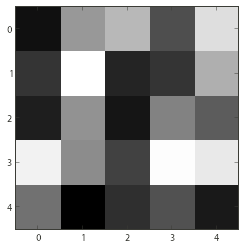

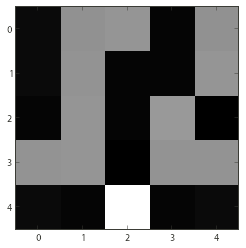

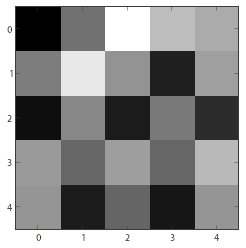

In [53]:
pylab.gray()
figure()
imshow(reshape(split(wsol[0,:],2)[0],[N,N]),interpolation='nearest')
figure()
imshow(reshape(split(wsol[500,:],2)[0],[N,N]),interpolation='nearest')
figure()
imshow(reshape(split(wsol[-1,:],2)[0],[N,N]),interpolation='nearest')

for ii in xrange(len(wsol)):
    if mod(ii,30)==0:
        imshow(reshape(split(wsol[ii,:],2)[0],[N,N]),interpolation='nearest')
        nm = 'osc'+str(ii)+'.png'
        savefig(nm)
    